In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett

In [3]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train['target_3'] = train['target_3'].astype(int)
수치형_col = train.select_dtypes(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3437
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3438 non-null   int32  
 1   target_2               3438 non-null   int32  
 2   target_3               3438 non-null   int32  
 3   회계년도                   3438 non-null   int64  
 4   회사명                    3438 non-null   object 
 5   거래소코드                  3438 non-null   int64  
 6   산업군                    3438 non-null   object 
 7   차입금의존도                 3438 non-null   float64
 8   부채비율                   3438 non-null   float64
 9   순운전자본비율                3438 non-null   float64
 10  총자본정상영업이익률             3438 non-null   float64
 11  자기자본순이익률               3438 non-null   float64
 12  매출액총이익률                3438 non-null   float64
 13  금융비용부담률                3438 non-null   float64
 14  자본금회전률                 3438 non-null   float64
 15  유형자산

In [4]:
# 정상
pd.set_option('display.max_columns',None)
train[train['target_1']==0].describe()

,target_1,target_2,target_3,회계년도,거래소코드,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,재고자산회전률,자기자본회전률,타인자본회전률,총자본회전률,이익잉여금,외국인지분율,대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,업력,누적수익성비율,이자부담률,부채상환계수,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,EBITDA마진율,PBR변화율,ROA변화율,현금흐름/총부채비율,영업현금흐름-단기차입금,abs(영업현금흐름-당기순이익)/매출액
count,3388.0,3388.0,3388.0,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,0.0,0.0,0.0,2015.042503,29942.715466,-0.016432,-0.047243,0.022124,0.042354,0.057537,0.022762,-0.056719,0.007746,-0.018506,0.000186,-0.004090,0.018006,0.013895,0.007347,0.007988,0.007627,-0.016061,0.018163,-0.014573,0.017578,0.018120,-0.000743,0.045914,0.002663,0.001604,0.020191,0.019655,-0.057806,0.003596,0.046403,0.008925,-0.004673,0.048270,-0.012070,0.027078,0.015761,0.005013,-0.030929
std,0.0,0.0,0.0,2.015579,42867.169177,0.970349,0.711869,0.969855,0.901864,0.388562,0.946852,0.613601,1.004719,0.727760,1.004688,0.967929,0.995454,0.997399,1.004780,1.001557,0.992066,0.174625,0.974271,0.191592,0.937315,0.855049,1.001530,0.886042,1.007244,1.007413,0.955353,0.133836,0.654017,0.987689,0.812652,1.001196,0.997275,0.717756,0.257563,0.660304,0.988001,0.998744,0.120953
min,0.0,0.0,0.0,2012.000000,40.000000,-1.494059,-0.745476,-2.823714,-5.219534,-3.804284,-1.867339,-1.869933,-0.732534,-0.289830,-0.257572,-1.253403,-1.515221,-1.824670,-0.560999,-0.799284,-2.391527,-0.565446,-3.499122,-0.820753,-3.490998,-8.157067,-2.054811,-5.911701,-0.289042,-0.143702,-3.748646,-0.603123,-0.570676,-0.994562,-6.250837,-1.634628,-13.383415,-3.923015,-0.514091,-7.467873,-3.339954,-7.646757,-0.140164
25%,0.0,0.0,0.0,2013.000000,4120.000000,-0.796191,-0.477144,-0.643051,-0.431230,-0.017133,-0.600326,-0.404135,-0.554123,-0.214059,-0.217332,-0.626941,-0.669301,-0.686119,-0.287641,-0.674909,-0.709125,-0.077983,-0.446275,-0.080902,-0.431801,-0.178441,-0.585354,-0.522361,-0.161478,-0.104149,-0.525770,-0.050373,-0.439285,-0.600418,-0.280073,-0.314056,0.013496,-0.376392,-0.167618,-0.032084,-0.538744,-0.096838,-0.107352
50%,0.0,0.0,0.0,2015.000000,10600.000000,-0.067590,-0.226162,0.014906,0.000739,0.105226,-0.220009,-0.185912,-0.320462,-0.164154,-0.194548,-0.286341,-0.192115,-0.150330,-0.244165,-0.415126,0.042748,-0.049412,-0.078571,-0.033149,-0.102877,-0.046970,0.122162,0.054323,-0.151849,-0.103117,0.021153,0.013726,-0.284042,-0.289664,0.065734,-0.272902,0.106309,-0.063669,-0.067405,0.044139,-0.168696,0.023413,-0.063774
75%,0.0,0.0,0.0,2017.000000,34300.000000,0.666184,0.147301,0.697740,0.518042,0.230203,0.338731,0.147598,0.177422,-0.083418,-0.149782,0.309710,0.451363,0.474757,-0.126189,0.348863,0.704346,0.003164,0.316363,0.024404,0.279254,0.120712,0.666405,0.653995,-0.122435,-0.100071,0.575000,0.088668,0.058865,0.228325,0.477223,-0.136111,0.165732,0.340076,0.073604,0.144467,0.352000,0.084185,0.000818
max,0.0,0.0,0.0,2018.000000,272550.000000,2.758573,8.934264,2.890323,3.296435,1.644383,3.822482,4.314417,10.020020,9.945080,15.287118,6.981833,5.064161,4.604794,13.588050,4.944047,2.584344,2.362009,10.299486,2.618934,8.164299,8.956042,3.061076,2.094905,23.469440,24.361287,3.453176,0.561047,5.097142,7.446242,2.687332,11.030404,6.448006,4.004425,1.917413,5.360324,5.693167,10.075162,1.733486


In [5]:
# 부실
train[train['target_1']==1].describe()

,target_1,target_2,target_3,회계년도,거래소코드,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,매출액총이익률,금융비용부담률,자본금회전률,유형자산회전율,재고자산회전률,자기자본회전률,타인자본회전률,총자본회전률,이익잉여금,외국인지분율,대주주지분율,유형자산증가율,매출액증가율,자기자본증가율,총자본증가율,정상영업이익증가율,업력,누적수익성비율,이자부담률,부채상환계수,현금흐름 대 자산,현금흐름 대 매출액,TMD,시총/총자산,EBIT/총자산,당기전기영업손익,FINDEP,EBITDA마진율,PBR변화율,ROA변화율,현금흐름/총부채비율,영업현금흐름-단기차입금,abs(영업현금흐름-당기순이익)/매출액
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.0,0.800000,0.800000,2013.940000,27021.200000,1.113399,3.201191,-1.499104,-2.869929,-3.898679,-1.542351,3.843303,-0.524848,1.253987,-0.012591,0.277110,-1.220089,-0.941511,-0.497852,-0.541258,-0.516807,1.088287,-1.230748,0.987498,-1.191104,-1.227836,0.050322,-3.111123,-0.180461,-0.108678,-1.368176,-1.331838,3.916961,-0.243694,-3.144299,-0.604737,0.316665,-3.270755,0.817884,-1.834835,-1.067948,-0.339666,2.095725
std,0.0,0.404061,0.404061,1.695251,34896.205141,1.948203,4.952159,1.678803,2.326637,6.632370,2.393692,5.370600,0.318774,5.650253,0.625295,2.307339,0.355585,0.694271,0.348899,0.722530,1.362635,8.174906,1.727293,8.161876,2.822414,4.250439,0.909128,2.423830,0.044510,0.006656,2.266485,8.190753,4.970933,1.634248,3.778527,0.704817,1.145962,4.845198,8.055129,6.044816,1.228271,1.046347,8.037673
min,1.0,0.000000,0.000000,2012.000000,360.000000,-1.494059,-0.779225,-7.478388,-9.411952,-29.259237,-14.751836,-0.519422,-0.742366,-0.302372,-0.257572,-1.375046,-1.659823,-2.137213,-2.073479,-0.799284,-2.714750,-0.629932,-4.338103,-7.089260,-4.776724,-22.206894,-1.891538,-13.911400,-0.482093,-0.131706,-11.917941,-58.044850,-0.565327,-1.046716,-11.665551,-5.259199,-2.108394,-31.248947,-26.980925,-31.052726,-7.864043,-5.271478,-0.124708
25%,1.0,1.000000,1.000000,2013.000000,4740.000000,-0.996712,-0.779225,-2.557059,-4.214337,-4.422843,-2.120282,1.115189,-0.701223,-0.250638,-0.227015,-1.375046,-1.455573,-1.478640,-0.524067,-0.788036,-1.582837,-0.190783,-2.463208,-1.393340,-2.614862,-0.902468,-0.313233,-3.989834,-0.179885,-0.108790,-1.807944,-0.332773,0.344590,-0.973867,-5.464066,-0.677397,0.086138,-4.053953,-0.706371,-0.867347,-1.204822,-0.221718,0.080476
50%,1.0,1.000000,1.000000,2014.000000,10500.000000,1.258468,0.995001,-1.336769,-2.428124,-1.828069,-1.243599,2.440996,-0.639134,-0.214320,-0.201232,-0.623900,-1.330854,-1.110285,-0.372474,-0.740449,-0.656727,-0.110575,-1.397049,-0.449198,-1.470589,-0.112911,0.231011,-2.547505,-0.170878,-0.106121,-0.993016,-0.116930,1.914281,-0.838650,-2.218060,-0.456013,0.147937,-1.799547,-0.126892,-0.116783,-0.772147,0.014983,0.536550
75%,1.0,1.000000,1.000000,2015.000000,31960.000000,2.525646,5.321533,-0.295933,-1.340005,-0.065800,-0.766438,4.592342,-0.487385,0.036249,-0.062350,0.885994,-1.088646,-0.557753,-0.326157,-0.602879,0.350505,-0.064337,-0.236567,0.370089,-0.734351,0.096281,0.557557,-1.527672,-0.167980,-0.104935,-0.535099,-0.036726,6.070153,-0.472696,-1.114913,-0.352894,0.192535,-0.916638,0.572031,0.090750,-0.624025,0.052899,1.553072
max,1.0,1.000000,1.000000,2018.000000,117930.000000,4.917144,19.340765,1.583739,2.069950,-0.046522,2.755559,31.666374,1.105332,34.844141,3.813089,7.590048,-0.040283,1.590983,0.046998,4.243219,2.444827,57.639927,5.222463,49.501220,13.927024,10.152375,1.482770,0.522417,-0.162983,-0.103317,3.207028,0.560934,18.936725,8.673203,8.168663,-0.137881,6.817746,3.382825,45.227457,0.659683,0.720578,0.430788,57.211709


In [6]:

pd.reset_option('display.max_columns',None)

---
## 정규성 검정
---

In [7]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [8]:
normal_test('shapiro',수치형_col)

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 매출액총이익률
 6                 금융비용부담률
 7                  자본금회전률
 8                 유형자산회전율
 9                 재고자산회전률
 10                자기자본회전률
 11                타인자본회전률
 12                 총자본회전률
 13                  이익잉여금
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                     업력
 22                누적수익성비율
 23                  이자부담률
 24                 부채상환계수
 25              현금흐름 대 자산
 26             현금흐름 대 매출액
 27                    TMD
 28                 시총/총자산
 29               EBIT/총자산
 30               당기전기영업손익
 31                 FINDEP
 32              EBITDA마진율
 33                 PBR변화율
 34    

In [9]:
normal_test('kstest',수치형_col)

(    normal
 0  순운전자본비율,
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2              총자본정상영업이익률
 3                자기자본순이익률
 4                 매출액총이익률
 5                 금융비용부담률
 6                  자본금회전률
 7                 유형자산회전율
 8                 재고자산회전률
 9                 자기자본회전률
 10                타인자본회전률
 11                 총자본회전률
 12                  이익잉여금
 13                 외국인지분율
 14                 대주주지분율
 15                유형자산증가율
 16                 매출액증가율
 17                자기자본증가율
 18                 총자본증가율
 19              정상영업이익증가율
 20                     업력
 21                누적수익성비율
 22                  이자부담률
 23                 부채상환계수
 24              현금흐름 대 자산
 25             현금흐름 대 매출액
 26                    TMD
 27                 시총/총자산
 28               EBIT/총자산
 29               당기전기영업손익
 30                 FINDEP
 31              EBITDA마진율
 32                 PBR변화율
 33                 ROA변화율
 34             현금흐름/총부채비율
 35

---
## 등분산성검정
---

In [10]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train.info()
수치형_col = train.select_dtypes(float)
col_int = 수치형_col.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3437
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3438 non-null   int32  
 1   target_2               3438 non-null   int32  
 2   target_3               3438 non-null   float64
 3   회계년도                   3438 non-null   int64  
 4   회사명                    3438 non-null   object 
 5   거래소코드                  3438 non-null   int64  
 6   산업군                    3438 non-null   object 
 7   차입금의존도                 3438 non-null   float64
 8   부채비율                   3438 non-null   float64
 9   순운전자본비율                3438 non-null   float64
 10  총자본정상영업이익률             3438 non-null   float64
 11  자기자본순이익률               3438 non-null   float64
 12  매출액총이익률                3438 non-null   float64
 13  금융비용부담률                3438 non-null   float64
 14  자본금회전률                 3438 non-null   float64
 15  유형자산

In [11]:
def homoscedasticity_test(df, col,tool):
        dict_1 = {"변수" : [], "p_val" : [], "T" : [] }
        dict_2 = {"변수" : [], "p_val" : [], "T" : [] }
        if tool == "levene":
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_1["변수"].append(i)
                        dict_1["p_val"].append(p_val)
                        dict_1["T"].append(T)

                return  pd.DataFrame(dict_1)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_2["변수"].append(i)
                        dict_2["p_val"].append(p_val)
                        dict_2["T"].append(T)

                        
                return pd.DataFrame(dict_2) 


In [12]:
## 정규성을 따를때 등분산성 검정
bartlett = homoscedasticity_test(수치형_col,col_int,"bartlett")

bartlett[bartlett['p_val']>0.05]
#

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,변수,p_val,T
15,외국인지분율,0.073186,3.210078
22,업력,0.661524,0.191678
37,영업현금흐름-단기차입금,0.223950,1.478877


In [13]:
# 정규성을 따르지 않을때 등분산성 검정
levene = homoscedasticity_test(수치형_col, col_int,"levene")

등분산변수 = levene[levene['p_val']>0.05]['변수'].to_list()
이분산변수 = levene[levene['p_val']<0.05]['변수'].to_list()

levene[levene['p_val']>0.05]

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,변수,p_val,T
10,재고자산회전률,0.888960,0.019497
13,총자본회전률,0.077811,3.111895
14,이익잉여금,0.597317,0.279114
22,업력,0.580989,0.304696
24,이자부담률,0.345325,0.890807
25,부채상환계수,0.524116,0.405869
29,시총/총자산,0.112918,2.514191
31,당기전기영업손익,0.809431,0.058167
32,FINDEP,0.285127,1.142847
36,현금흐름/총부채비율,0.652807,0.202415


---
##t-test
---

In [14]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [15]:
## 등분산성 t-test
student = t_test(수치형_col,등분산변수,'student')
student[student['p_val']<0.05]

student_변수  = student[student['p_val']<0.05]['변수'].to_list()
student[student['p_val']<0.05]

,변수,p_val,t-val
1,총자본회전률,3.539387e-09,-5.919838
2,이익잉여금,5.907088e-04,-3.439049
7,당기전기영업손익,3.658109e-05,-4.133501
9,현금흐름/총부채비율,6.782050e-13,-7.211345
10,영업현금흐름-단기차입금,3.990827e-02,-2.055478


In [16]:
## 이분산성 t-test
welch = t_test(수치형_col,이분산변수,'welch')


welch_변수  = welch[welch['p_val']<0.05]['변수'].to_list()
welch[welch['p_val']<0.05]

,변수,p_val,t-val
0,차입금의존도,9.499093e-03,2.727480
1,부채비율,1.345336e-03,3.453757
2,순운전자본비율,3.529970e-06,-5.392923
3,총자본정상영업이익률,2.597116e-10,-8.415463
4,자기자본순이익률,8.974055e-04,-3.595778
5,매출액총이익률,8.091929e-05,-4.400143
6,금융비용부담률,4.620968e-05,4.582990
7,자본금회전률,2.989242e-21,-14.568138
10,타인자본회전률,1.208387e-23,-19.432200
11,외국인지분율,2.877094e-04,-3.969748


In [17]:
t_검정변수 = student_변수 + welch_변수
t_검정변수

['총자본회전률',
 '이익잉여금',
 '당기전기영업손익',
 '현금흐름/총부채비율',
 '영업현금흐름-단기차입금',
 '차입금의존도',
 '부채비율',
 '순운전자본비율',
 '총자본정상영업이익률',
 '자기자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '자본금회전률',
 '타인자본회전률',
 '외국인지분율',
 '대주주지분율',
 '매출액증가율',
 '총자본증가율',
 '정상영업이익증가율',
 '누적수익성비율',
 '현금흐름 대 자산',
 'TMD',
 'EBIT/총자산',
 'EBITDA마진율',
 'ROA변화율']

---
## 다중공선성 상관계수 확인
---

In [18]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
test = pd.read_csv('./datasets/전처리완료/코스피_test_std.csv',index_col=0)
명목형_col = [['회사명','거래소코드','회계년도','산업군','target_1','target_2','target_3']]

수치형_col = train[t_검정변수]
수치형_col 

,총자본회전률,이익잉여금,당기전기영업손익,현금흐름/총부채비율,영업현금흐름-단기차입금,차입금의존도,부채비율,순운전자본비율,총자본정상영업이익률,자기자본순이익률,...,대주주지분율,매출액증가율,총자본증가율,정상영업이익증가율,누적수익성비율,현금흐름 대 자산,TMD,EBIT/총자산,EBITDA마진율,ROA변화율
0,-1.087960,-0.560999,-0.424573,-0.264402,0.207751,2.089155,0.988299,-1.671059,-1.005904,-0.351182,...,-0.474914,0.142160,-0.536032,0.208387,-2.777277,0.258671,0.310809,-0.688606,1.290308,0.164827
1,-1.199583,-0.338437,-0.370508,-0.532390,0.109496,2.323451,1.693528,-1.812032,-0.917196,-1.021608,...,-0.474914,-1.117955,-0.879257,0.107156,-1.262720,-0.347291,0.156563,-0.886187,1.234136,-0.249398
2,-0.462874,-0.278809,0.149563,1.281530,0.552699,1.110587,0.339416,-0.071129,2.623411,0.816244,...,-1.625766,0.626570,-0.291493,0.105152,-0.796701,3.335149,-0.319682,1.279076,3.198131,0.004646
3,-0.663794,-0.226827,0.178943,1.050674,0.424186,0.682768,-0.078918,0.518156,2.039095,0.757174,...,-1.589782,-0.884134,-0.257567,-0.114478,-0.381272,2.231210,-0.291632,1.261388,3.057258,0.096196
4,-0.753092,-0.176657,0.083136,1.126087,0.408683,0.246429,-0.239478,0.532149,1.366071,0.451642,...,-1.580944,-0.316648,0.181687,-0.131023,-0.050992,1.983145,-0.278845,0.965432,2.544388,0.015046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,-0.507523,0.046998,-0.712752,-0.776173,-0.714323,2.181656,1.011608,-1.088513,-1.333738,-0.696579,...,-0.551301,-0.537857,-0.178700,-3.384466,-0.644647,-0.959194,1.021044,-1.266324,-0.688872,-3.032913
3434,-1.199583,-0.834700,-1.044565,-0.550682,0.201044,1.217085,10.642475,-0.758887,-1.482227,-5.596452,...,-1.939519,-2.942933,-2.426493,-0.073164,-1.901066,-0.324064,7.998213,-5.664488,-1.220428,-0.585793
3435,-1.132609,-0.510376,-0.599003,-0.868799,-0.035270,3.913625,-0.779225,-1.206162,-7.882703,-0.046522,...,0.981485,-3.556964,-3.206500,-2.954702,-5.178463,-1.668282,7.113288,-10.594920,-9.565744,-26.362530
3436,-1.065636,-0.326103,-0.341037,-1.780051,0.029201,-0.237987,2.007827,-1.680907,-1.865986,-0.046522,...,1.422129,0.533893,-1.386897,0.093232,-4.178176,-3.605556,-0.430819,5.739332,-1.880214,0.659683


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,6.136900,현금흐름/총부채비율
1,5.648154,총자본정상영업이익률
2,4.971692,현금흐름 대 자산
3,4.883803,EBIT/총자산
4,4.719994,타인자본회전률
5,4.618920,당기전기영업손익
6,4.490673,이익잉여금
7,2.917902,총자본회전률
8,2.519673,차입금의존도
9,2.443819,누적수익성비율


In [18]:
# drop_col = ['시총/총자산','총자본회전률']

In [21]:
# ##
# 수치형_col = 수치형_col.drop(drop_col,axis=1)

# # VIF 출력을 위한 데이터 프레임 형성
# vif = pd.DataFrame()

# # VIF 값과 각 Feature 이름에 대해 설정
# vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
# vif["features"] = 수치형_col.columns 

# # VIF 값이 높은 순으로 정렬
# vif = vif.sort_values(by="VIF Factor", ascending=False)
# vif = vif.reset_index().drop(columns='index')
# vif

,VIF Factor,features
0,7.553637,현금흐름 대 자산
1,7.025846,현금흐름 대 매출액
2,6.158604,현금흐름/총부채비율
3,5.249962,총자본정상영업이익률
4,4.779539,타인자본회전률
5,4.219109,EBIT/총자산
6,3.420288,이익잉여금
7,3.378255,당기전기영업손익
8,3.193192,TMD
9,3.142488,누적수익성비율


C:\Users\msi\AppData\Local\Temp\ipykernel_25480\2754315082.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

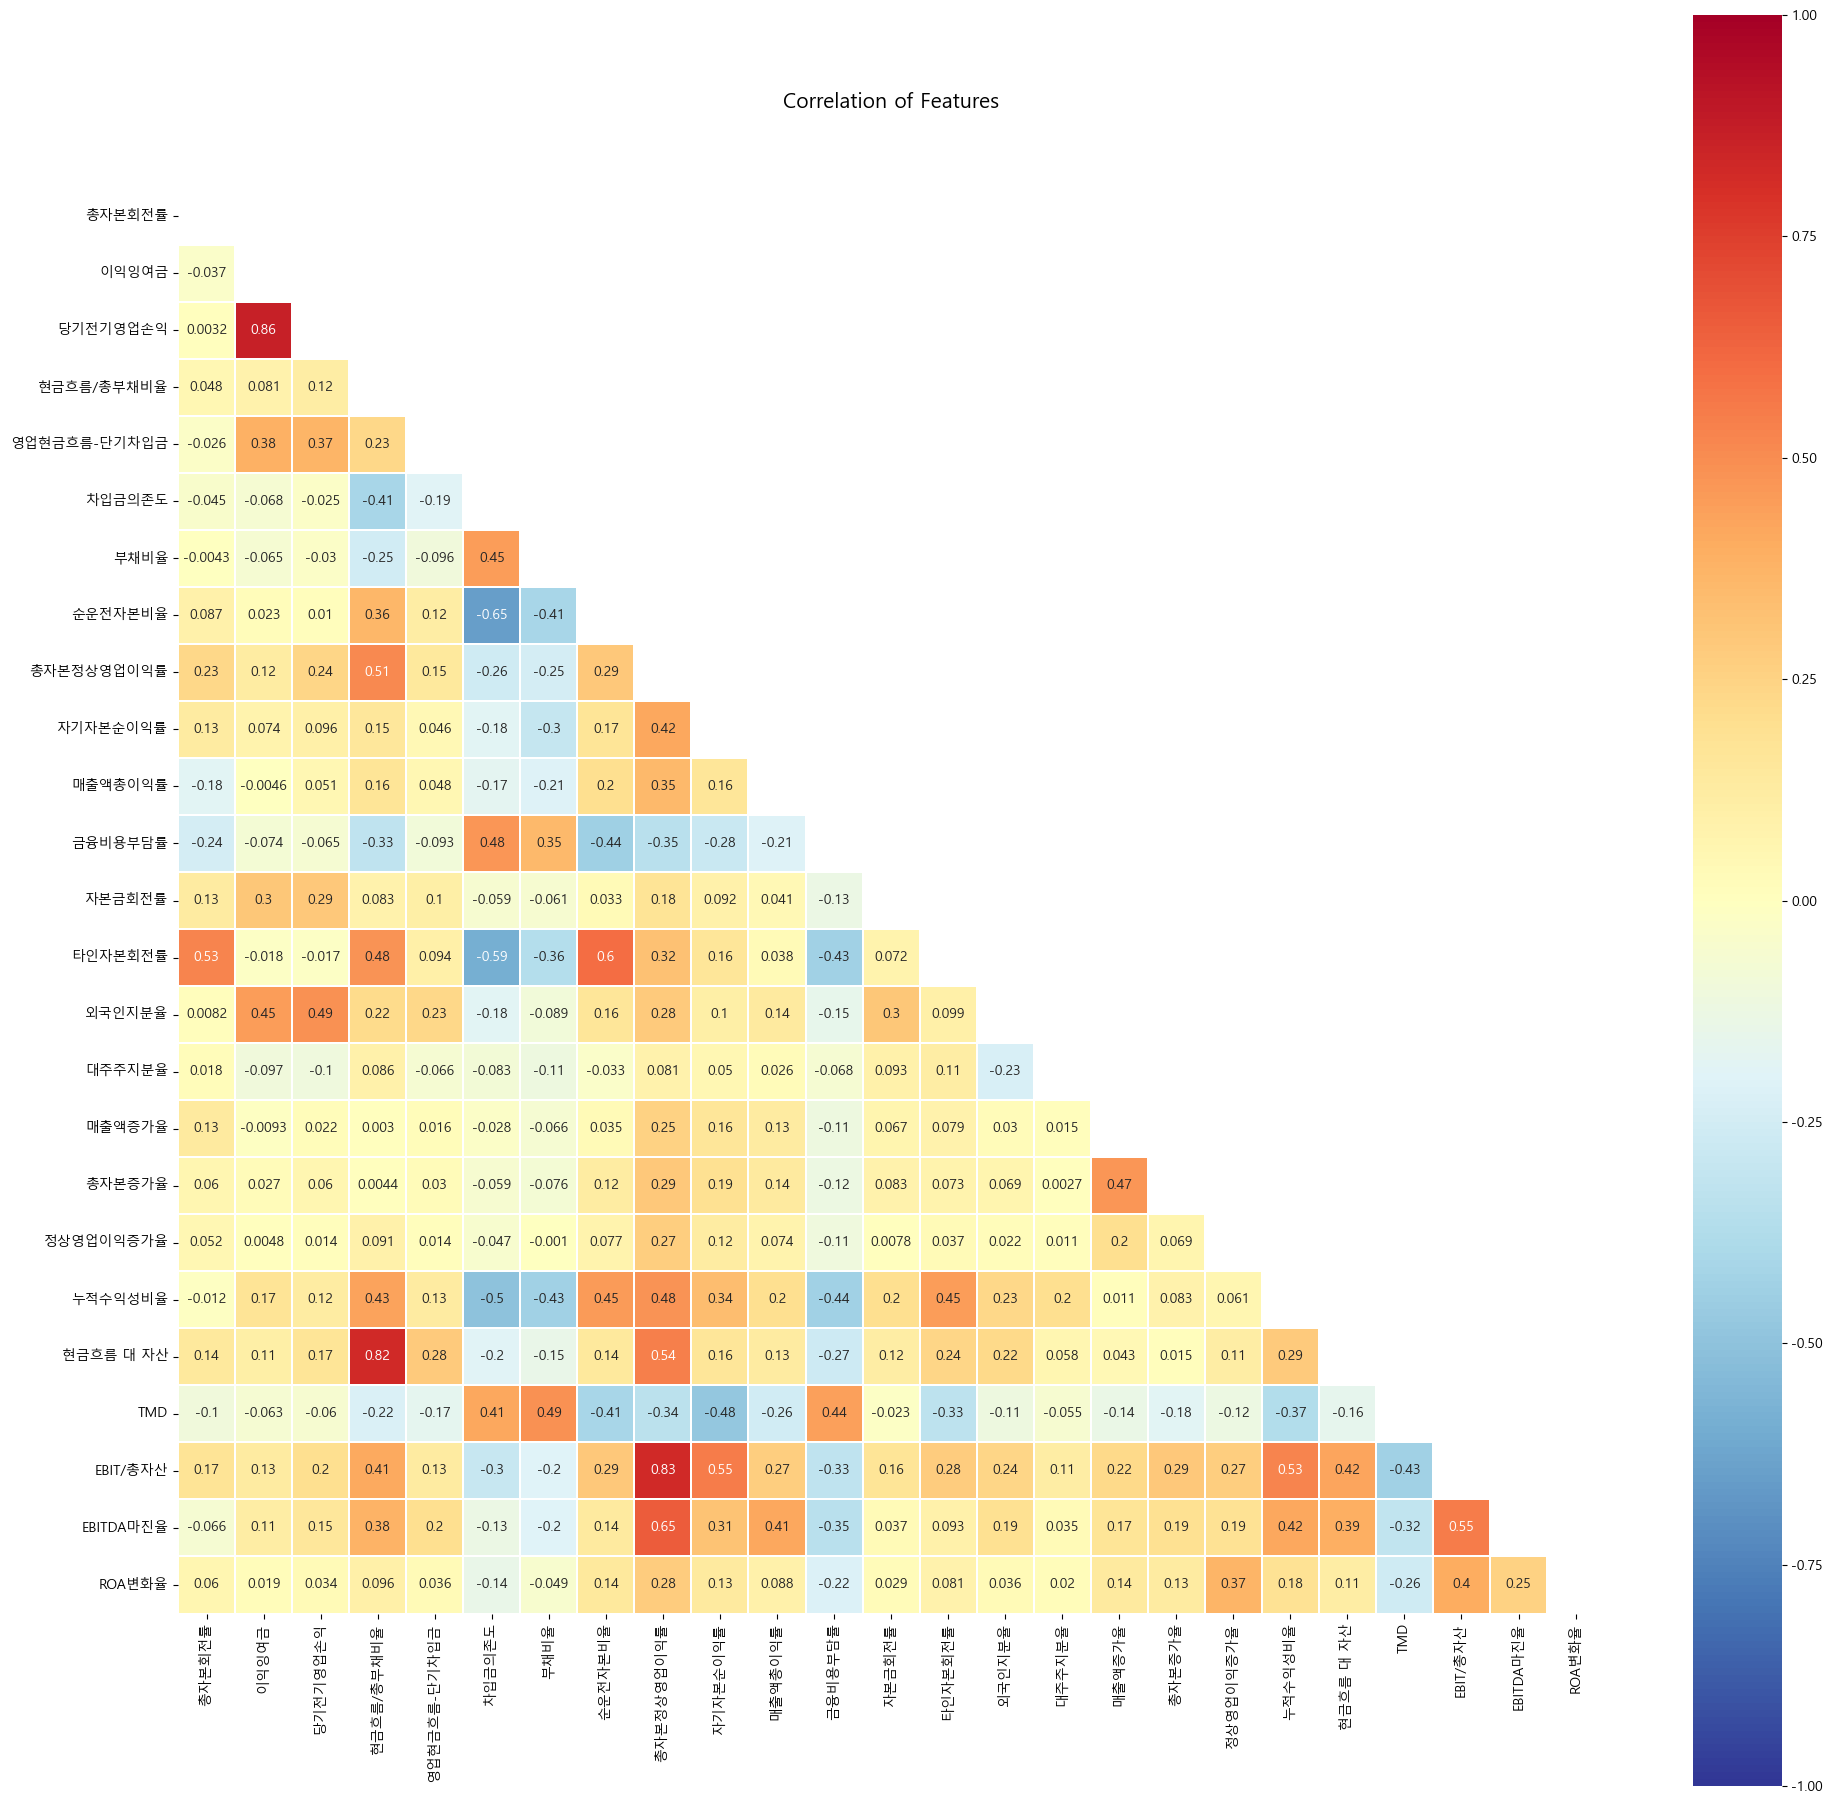

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot

corr = 수치형_col.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(23, 23))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})

In [21]:
last_col = 명목형_col[0]+vif['features'].to_list()
last_col

['회사명',
 '거래소코드',
 '회계년도',
 '산업군',
 'target_1',
 'target_2',
 'target_3',
 '현금흐름/총부채비율',
 '총자본정상영업이익률',
 '현금흐름 대 자산',
 'EBIT/총자산',
 '타인자본회전률',
 '당기전기영업손익',
 '이익잉여금',
 '총자본회전률',
 '차입금의존도',
 '누적수익성비율',
 'EBITDA마진율',
 '순운전자본비율',
 'TMD',
 '금융비용부담률',
 '자기자본순이익률',
 '부채비율',
 '외국인지분율',
 'ROA변화율',
 '총자본증가율',
 '매출액총이익률',
 '매출액증가율',
 '영업현금흐름-단기차입금',
 '자본금회전률',
 '정상영업이익증가율',
 '대주주지분율']

In [22]:
train = train[last_col]
test = test[last_col]

In [23]:
train.to_csv('./datasets/통계검증완료/코스피_standard_train.csv',encoding='utf-8-sig')
test.to_csv('./datasets/통계검증완료/코스피_standard_test.csv',encoding='utf-8-sig')